<a href="https://colab.research.google.com/github/Adipatel3009/Supervised-ML/blob/main/Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data set was generated by a Monte Carlo program, Corsika, described in:
Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

https://www.youtube.com/watch?v=i_LwzRVP7bg&t=44s

In [2]:
#with cols, we are making a list of headers for each column
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "Class"]
df = pd.read_csv('magic04.data', names=cols) #names is an in-built pandas function for read_csv


In [3]:
df["Class"] = (df["Class"] == "g").astype(int)

In [4]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  Class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

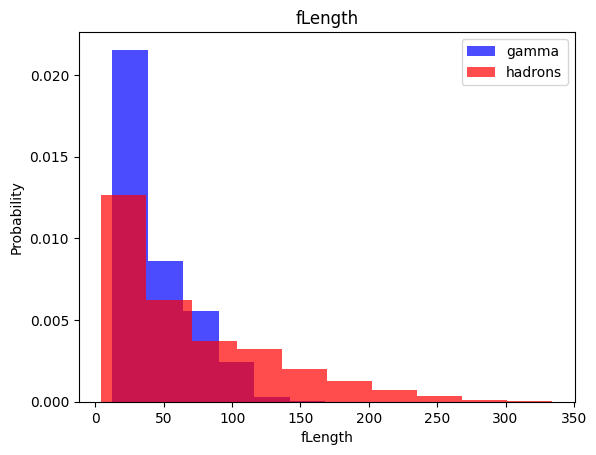

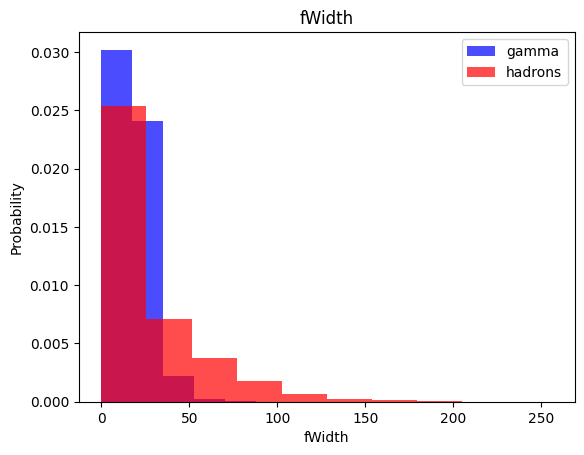

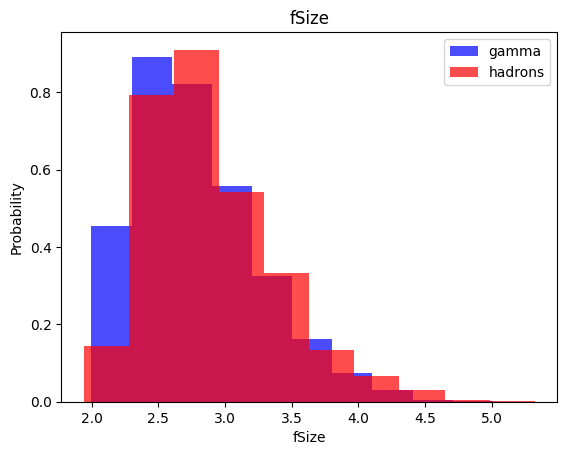

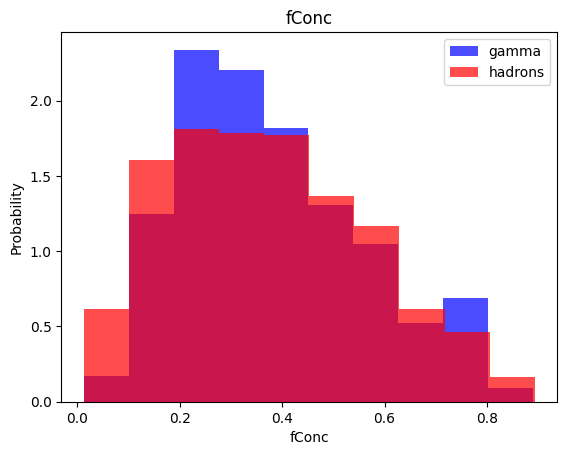

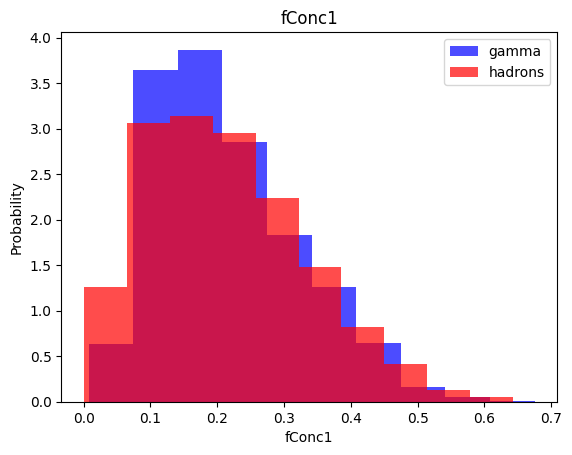

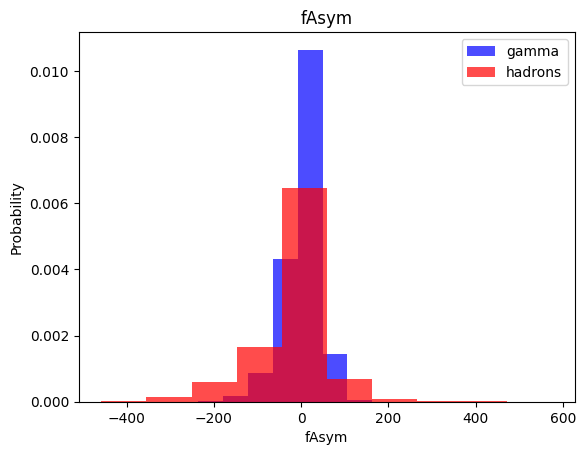

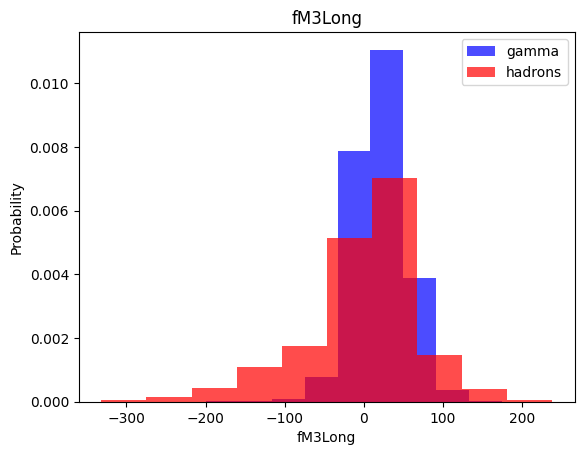

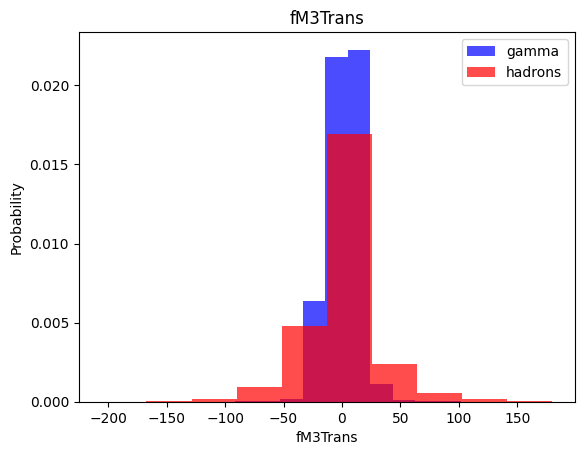

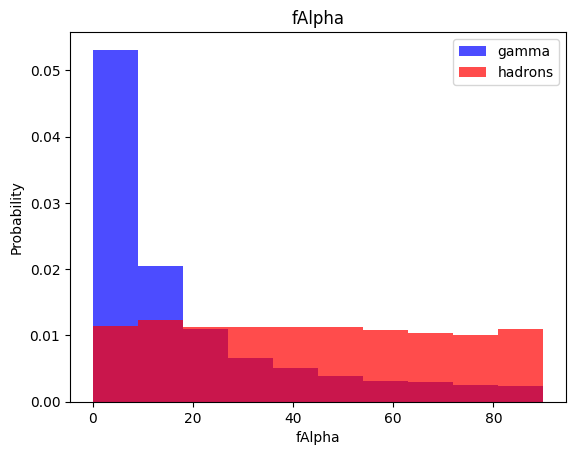

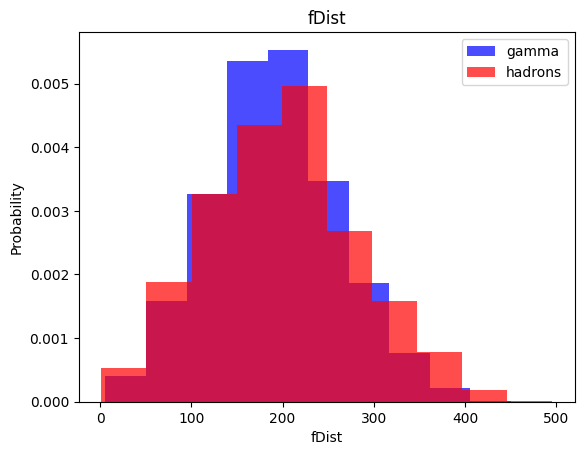

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['Class'] == 1][label], color = 'blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['Class'] == 0][label], color = 'red', label='hadrons', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validate, and Test Datasets

In [7]:
train, validate, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
# We are going to scale everything on the same scale, so we will transform it to a uniform mean of 0
# and std deviation. The goal of doing so is because different labels have different scale, and
# if we don't take this step, neural network may think something with a magnitude of 200 is more significant
# than something that is much smaller. Hence, the goal is such that everything is weighted equally.

In [9]:
def scale_dataset(dataframe, oversample = False):

  # get the values of everything except the last column and the Class separately

    # if it's a DataFrame, use iloc; if it's ndarray, use numpy slicing
  if isinstance(dataframe, pd.DataFrame):
        X = dataframe.iloc[:, :-1].to_numpy()
        Y = dataframe.iloc[:, -1].to_numpy()
  else:  # assume numpy array
        X = dataframe[:, :-1]
        Y = dataframe[:, -1]
  # get the mean and standard deviation
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X,Y)

  #stack the x and y horizontally
  data = np.hstack((X, np.reshape(Y, (-1,1)))) # -1 lets the compiler auto calculate the dimension
  return data, X, Y


In [10]:
#find the number of gammas and hadrons in our training data set
train, X_train, Y_train = scale_dataset(train, oversample=True)



In [11]:
len(Y_train)

14746

In [40]:
gamma_num = sum(Y_train == 1)
hadron_num = sum(Y_train == 0)

print(gamma_num)
print(hadron_num)

7409
7409


In [12]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
validate, X_validate, Y_validate = scale_dataset(validate, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)


# kNN


In [13]:
# use package from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(X_test)

In [16]:
y_pred

array([0., 1., 0., ..., 0., 1., 1.])

In [17]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1338
           1       0.87      0.82      0.85      2466

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, Y_train)

In [49]:
y_pred_nb = nb_model.predict(X_test)

In [50]:
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52      1351
           1       0.74      0.84      0.79      2453

    accuracy                           0.70      3804
   macro avg       0.67      0.65      0.65      3804
weighted avg       0.69      0.70      0.69      3804



# Logistic Regression


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, Y_train)

In [23]:
y_pred_log = log_model.predict(X_test)
print(classification_report(Y_test, y_pred_log))

              precision    recall  f1-score   support

           g       0.84      0.81      0.83      2489
           h       0.67      0.71      0.69      1315

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

In [24]:
from sklearn.svm import SVC

In [25]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [26]:
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_pred_svm, Y_test))

              precision    recall  f1-score   support

           g       0.85      0.91      0.88      2321
           h       0.84      0.74      0.79      1483

    accuracy                           0.84      3804
   macro avg       0.84      0.82      0.83      3804
weighted avg       0.84      0.84      0.84      3804



# Neural Networks

In [53]:
 # Tensorflow
 # model = tf.keras.Sequential([
  #    tf.keras.layers.Dense(16, activation='relu', input_shape=(10,)),
 #     tf.keras.layers.Dense(16, activation='relu'),
  #    tf.keras.layers.Dense(1). --> output layer
 #]

In [18]:
import tensorflow as tf

In [43]:
def plot_model(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

  ax1.plot(history.history['accuracy'], label='accuracy')
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch') # epochs are all the trainig cycles
  ax1.set_ylabel('Error')

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')


  ax1.grid(True)
  ax2.grid(True)

  plt.show()



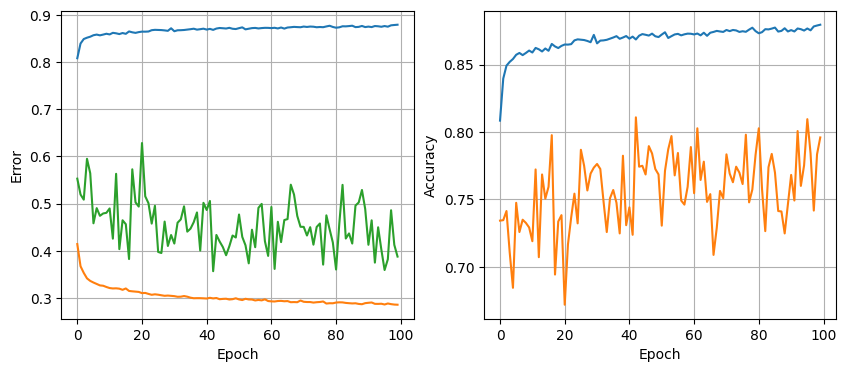

In [44]:
plot_model(history)

In [28]:
def nn_model(X_train, Y_train, num_nodes, dropout_probability, lr, batch_size,epochs):
  neural_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_probability),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_probability),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  neural_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                      metrics=['accuracy'])

  history = neural_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

  return history, neural_model

num_nodes: 16, dropout_probability: 0, lr: 0.01, batch_size: 32
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7881 - loss: 0.4449 - val_accuracy: 0.7176 - val_loss: 0.5232
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8457 - loss: 0.3619 - val_accuracy: 0.6875 - val_loss: 0.5957
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3407 - val_accuracy: 0.7322 - val_loss: 0.4839
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.3360 - val_accuracy: 0.6922 - val_loss: 0.5587
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8527 - loss: 0.3337 - val_accuracy: 0.7925 - val_loss: 0.3917
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.3218 - val_accuracy: 0.6946 - val_loss: 0.5618
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.3245 - val_accuracy: 0.7186 - val_loss: 0.5136
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.3184 - val_accuracy: 0.6692

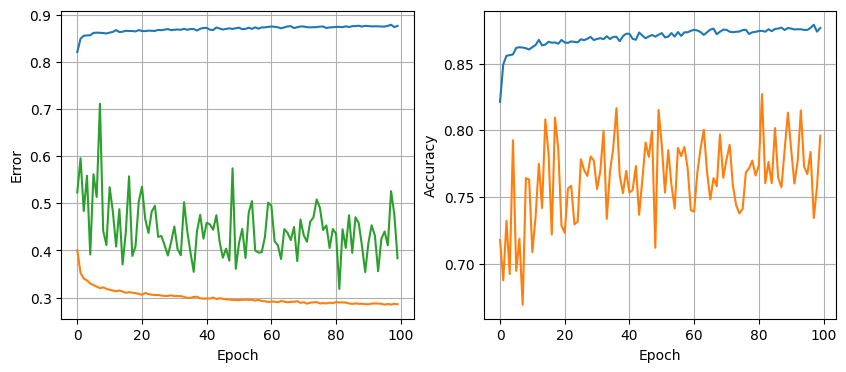

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.3714
num_nodes: 16, dropout_probability: 0, lr: 0.01, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7534 - loss: 0.4903 - val_accuracy: 0.6651 - val_loss: 0.6398
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8420 - loss: 0.3782 - val_accuracy: 0.6624 - val_loss: 0.6242
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8517 - loss: 0.3558 - val_accuracy: 0.7512 - val_loss: 0.5068
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8497 - loss: 0.3469 - val_accuracy: 0.7522 - val_loss: 0.4665
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.3443 - val_accuracy: 0.7285 - val_loss: 0.5054
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8597 - loss: 0.3258 - val_accuracy: 0.7376 - val_loss: 0.4608
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3330 

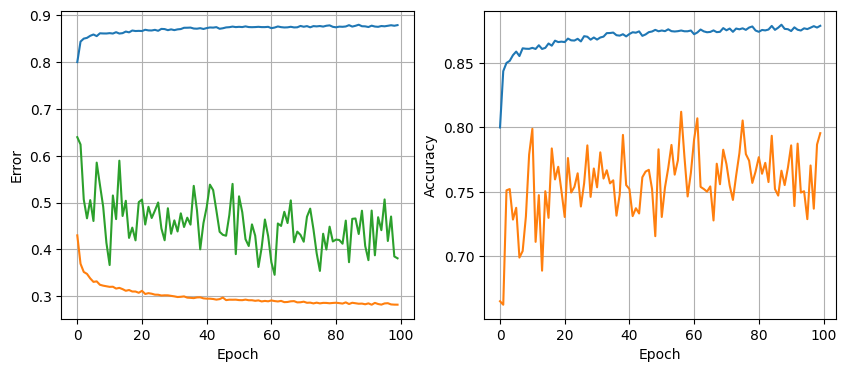

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.3852
num_nodes: 16, dropout_probability: 0, lr: 0.01, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7257 - loss: 0.5255 - val_accuracy: 0.7017 - val_loss: 0.5603
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.3772 - val_accuracy: 0.6898 - val_loss: 0.5934
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3484 - val_accuracy: 0.7471 - val_loss: 0.4682
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8537 - loss: 0.3372 - val_accuracy: 0.7169 - val_loss: 0.4975
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3337 - val_accuracy: 0.7617 - val_loss: 0.4331
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8559 - loss: 0.3286 - val_accuracy: 0.7115 - val_loss: 0.5288
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3276 - val_accurac

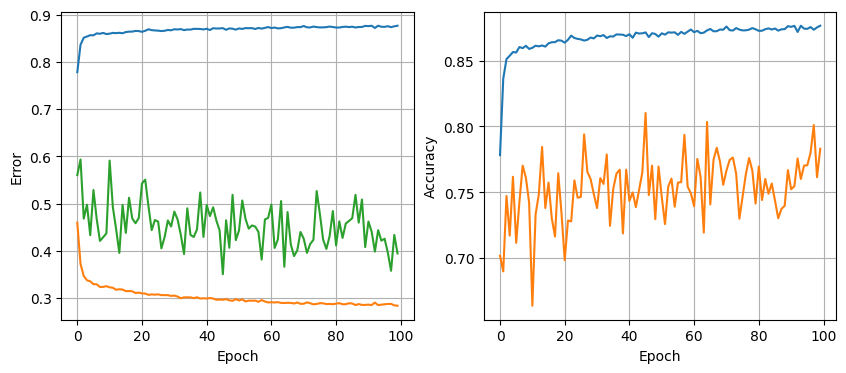

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3639
num_nodes: 16, dropout_probability: 0, lr: 0.005, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7623 - loss: 0.4950 - val_accuracy: 0.7546 - val_loss: 0.5433
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8445 - loss: 0.3660 - val_accuracy: 0.6824 - val_loss: 0.5871
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8531 - loss: 0.3424 - val_accuracy: 0.7268 - val_loss: 0.5369
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3309 - val_accuracy: 0.7678 - val_loss: 0.4182
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8525 - loss: 0.3391 - val_accuracy: 0.7207 - val_loss: 0.5243
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.3297 - val_accuracy: 0.7108 - val_loss: 0.5149
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.3245

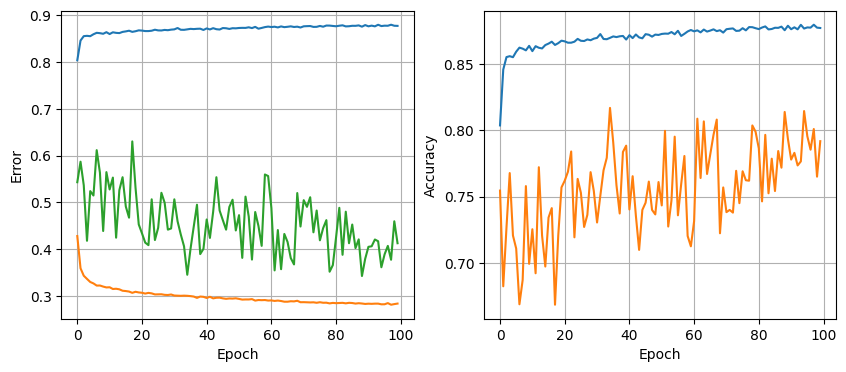

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8642 - loss: 0.3542
num_nodes: 16, dropout_probability: 0, lr: 0.005, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7504 - loss: 0.5035 - val_accuracy: 0.7146 - val_loss: 0.5504
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8450 - loss: 0.3640 - val_accuracy: 0.7119 - val_loss: 0.5603
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3556 - val_accuracy: 0.6549 - val_loss: 0.6819
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8476 - loss: 0.3540 - val_accuracy: 0.6983 - val_loss: 0.5973
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.3370 - val_accuracy: 0.7441 - val_loss: 0.4983
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 0.3359 - val_accuracy: 0.7159 - val_loss: 0.5395
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8616 - loss: 0.3271

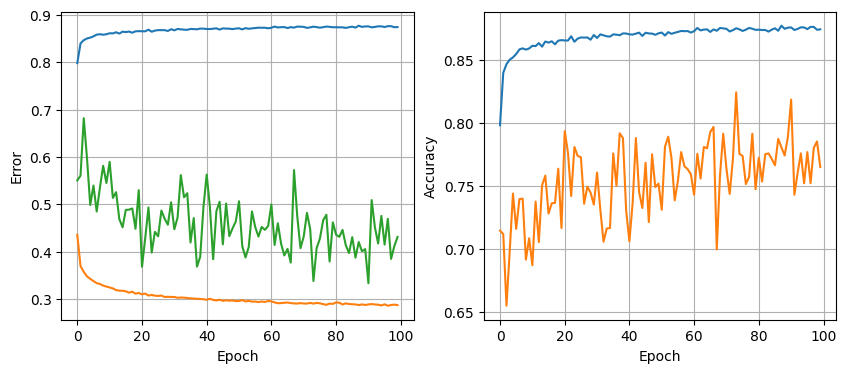

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3504
num_nodes: 16, dropout_probability: 0, lr: 0.005, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7129 - loss: 0.5550 - val_accuracy: 0.6485 - val_loss: 0.6124
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.4129 - val_accuracy: 0.6919 - val_loss: 0.5548
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8400 - loss: 0.3703 - val_accuracy: 0.7034 - val_loss: 0.5471
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8464 - loss: 0.3549 - val_accuracy: 0.7275 - val_loss: 0.5099
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8453 - loss: 0.3459 - val_accuracy: 0.7390 - val_loss: 0.5077
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3399 - val_accuracy: 0.7105 - val_loss: 0.5504
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3333 - val_accura

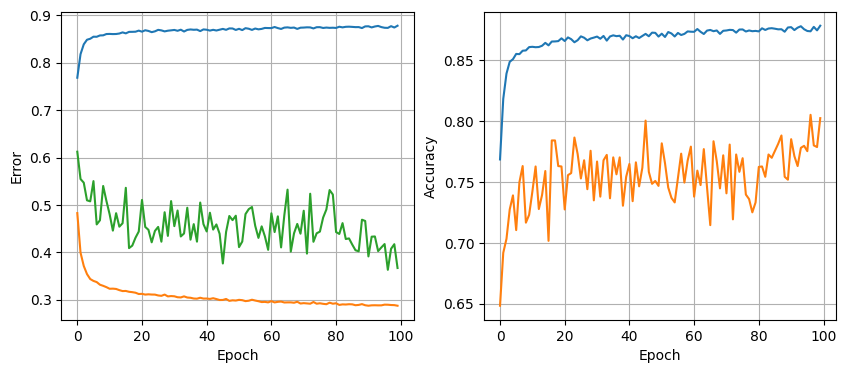

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3561
num_nodes: 16, dropout_probability: 0, lr: 0.001, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6453 - loss: 0.6076 - val_accuracy: 0.6020 - val_loss: 0.6379
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8221 - loss: 0.4011 - val_accuracy: 0.7105 - val_loss: 0.5130
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8267 - loss: 0.3889 - val_accuracy: 0.6797 - val_loss: 0.5954
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8430 - loss: 0.3642 - val_accuracy: 0.7342 - val_loss: 0.5059
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8439 - loss: 0.3606 - val_accuracy: 0.7258 - val_loss: 0.5301
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.3592 - val_accuracy: 0.6844 - val_loss: 0.5919
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3447

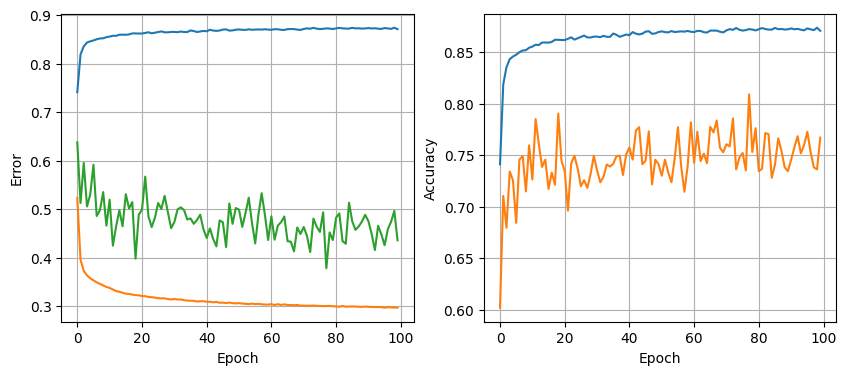

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3452
num_nodes: 16, dropout_probability: 0, lr: 0.001, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5464 - loss: 0.6817 - val_accuracy: 0.5485 - val_loss: 0.6438
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.4647 - val_accuracy: 0.6390 - val_loss: 0.6335
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8190 - loss: 0.4074 - val_accuracy: 0.6698 - val_loss: 0.5809
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.3869 - val_accuracy: 0.7112 - val_loss: 0.5393
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8363 - loss: 0.3776 - val_accuracy: 0.7356 - val_loss: 0.5183
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8396 - loss: 0.3684 - val_accuracy: 0.7264 - val_loss: 0.5172
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8435 - loss: 0.3670

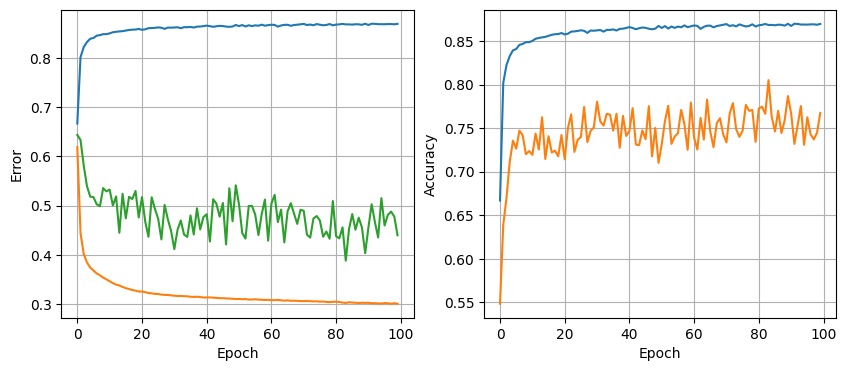

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3371
num_nodes: 16, dropout_probability: 0, lr: 0.001, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6844 - loss: 0.6292 - val_accuracy: 0.4953 - val_loss: 0.7664
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7786 - loss: 0.4833 - val_accuracy: 0.6251 - val_loss: 0.6266
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7992 - loss: 0.4346 - val_accuracy: 0.6597 - val_loss: 0.6018
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.3963 - val_accuracy: 0.6763 - val_loss: 0.5960
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.3836 - val_accuracy: 0.7156 - val_loss: 0.5330
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8463 - loss: 0.3635 - val_accuracy: 0.6956 - val_loss: 0.5731
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8397 - loss: 0.3731 - val_accura

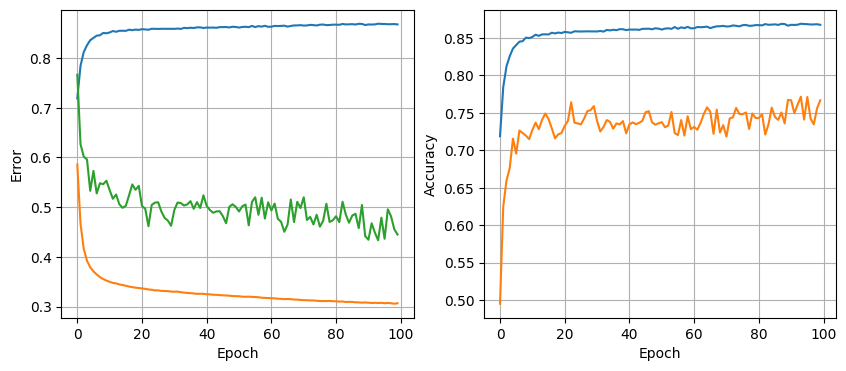

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.3422
num_nodes: 16, dropout_probability: 0.2, lr: 0.01, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7587 - loss: 0.5047 - val_accuracy: 0.6695 - val_loss: 0.6417
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8214 - loss: 0.4076 - val_accuracy: 0.6451 - val_loss: 0.6129
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8341 - loss: 0.3828 - val_accuracy: 0.6912 - val_loss: 0.5497
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.3754 - val_accuracy: 0.6834 - val_loss: 0.5617
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8406 - loss: 0.3675 - val_accuracy: 0.6434 - val_loss: 0.5441
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8429 - loss: 0.3642 - val_accuracy: 0.7102 - val_loss: 0.4899
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8426 - loss: 0.368

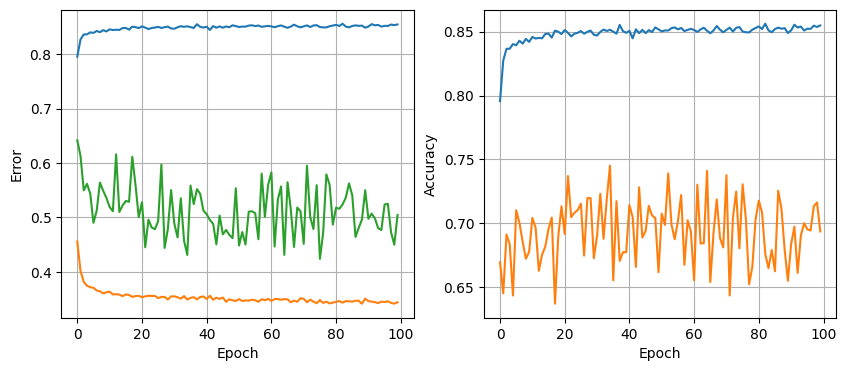

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3234
num_nodes: 16, dropout_probability: 0.2, lr: 0.01, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7517 - loss: 0.5103 - val_accuracy: 0.6763 - val_loss: 0.5687
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8237 - loss: 0.4101 - val_accuracy: 0.7136 - val_loss: 0.5413
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8321 - loss: 0.3904 - val_accuracy: 0.6478 - val_loss: 0.6027
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8356 - loss: 0.3827 - val_accuracy: 0.6580 - val_loss: 0.5805
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8422 - loss: 0.3665 - val_accuracy: 0.6736 - val_loss: 0.5843
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8482 - loss: 0.3609 - val_accuracy: 0.6502 - val_loss: 0.5812
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8391 - loss: 0.369

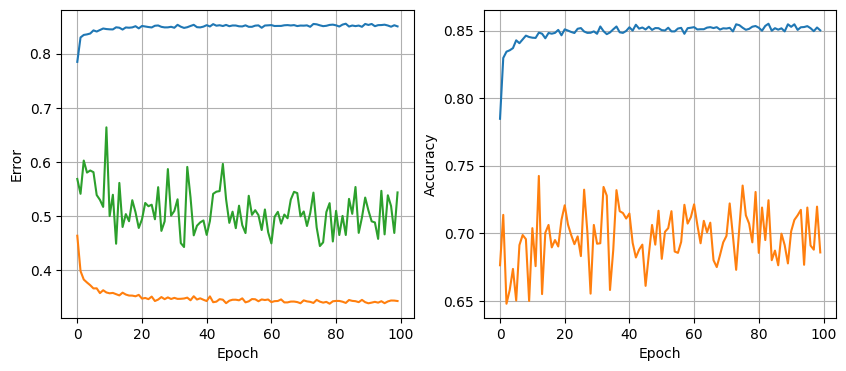

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3218
num_nodes: 16, dropout_probability: 0.2, lr: 0.01, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6939 - loss: 0.5673 - val_accuracy: 0.6319 - val_loss: 0.6315
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.4197 - val_accuracy: 0.6712 - val_loss: 0.5968
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8333 - loss: 0.4059 - val_accuracy: 0.7010 - val_loss: 0.5340
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8364 - loss: 0.3840 - val_accuracy: 0.7197 - val_loss: 0.4621
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8365 - loss: 0.3795 - val_accuracy: 0.6556 - val_loss: 0.6186
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8452 - loss: 0.3712 - val_accuracy: 0.7014 - val_loss: 0.5300
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8406 - loss: 0.3731 - val_accur

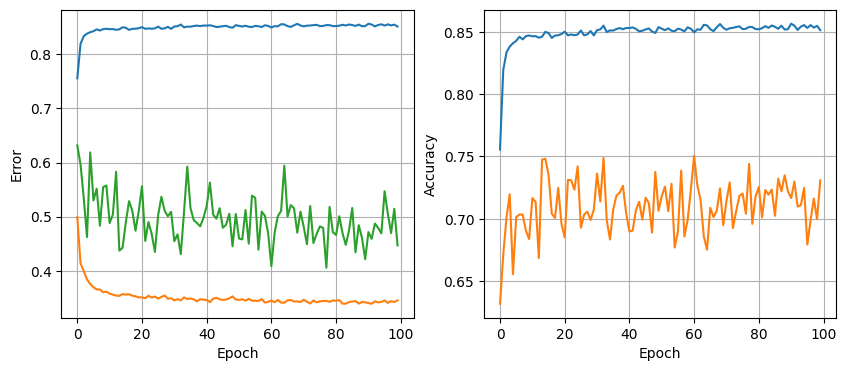

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3433
num_nodes: 16, dropout_probability: 0.2, lr: 0.005, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7388 - loss: 0.5333 - val_accuracy: 0.6763 - val_loss: 0.5768
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8093 - loss: 0.4318 - val_accuracy: 0.6492 - val_loss: 0.6257
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8333 - loss: 0.3981 - val_accuracy: 0.7261 - val_loss: 0.4956
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.3739 - val_accuracy: 0.7549 - val_loss: 0.4506
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3651 - val_accuracy: 0.7034 - val_loss: 0.5219
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.3697 - val_accuracy: 0.7627 - val_loss: 0.4724
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.36

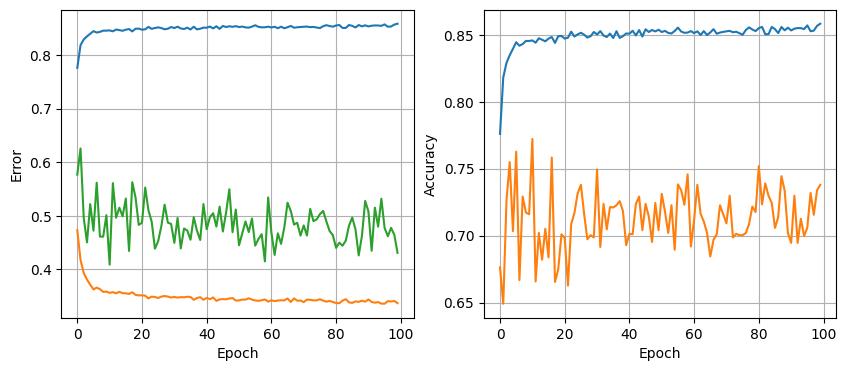

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8628 - loss: 0.3480
num_nodes: 16, dropout_probability: 0.2, lr: 0.005, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6790 - loss: 0.5820 - val_accuracy: 0.6359 - val_loss: 0.6261
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8147 - loss: 0.4135 - val_accuracy: 0.6475 - val_loss: 0.6305
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8337 - loss: 0.3911 - val_accuracy: 0.7061 - val_loss: 0.5569
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8331 - loss: 0.3905 - val_accuracy: 0.7020 - val_loss: 0.5372
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8431 - loss: 0.3753 - val_accuracy: 0.6820 - val_loss: 0.6084
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3774 - val_accuracy: 0.6664 - val_loss: 0.6058
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.36

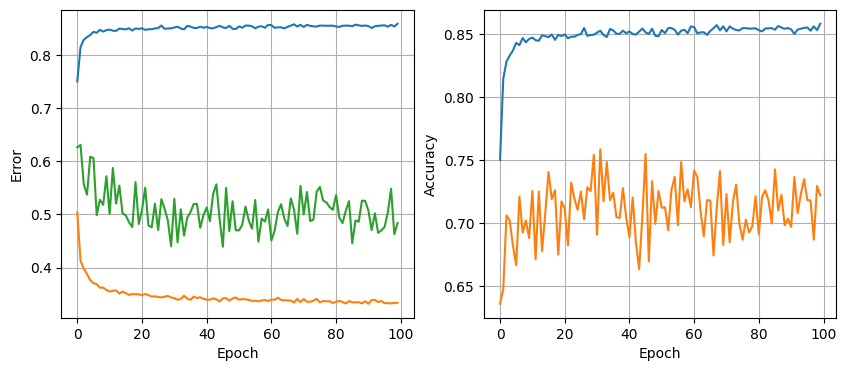

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8670 - loss: 0.3348
num_nodes: 16, dropout_probability: 0.2, lr: 0.005, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6548 - loss: 0.6013 - val_accuracy: 0.6132 - val_loss: 0.6596
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 0.4425 - val_accuracy: 0.6356 - val_loss: 0.6128
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.4192 - val_accuracy: 0.6705 - val_loss: 0.5803
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8243 - loss: 0.4048 - val_accuracy: 0.7024 - val_loss: 0.5406
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8295 - loss: 0.3879 - val_accuracy: 0.7125 - val_loss: 0.5457
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8314 - loss: 0.3871 - val_accuracy: 0.6969 - val_loss: 0.5466
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8399 - loss: 0.3763 - val_accu

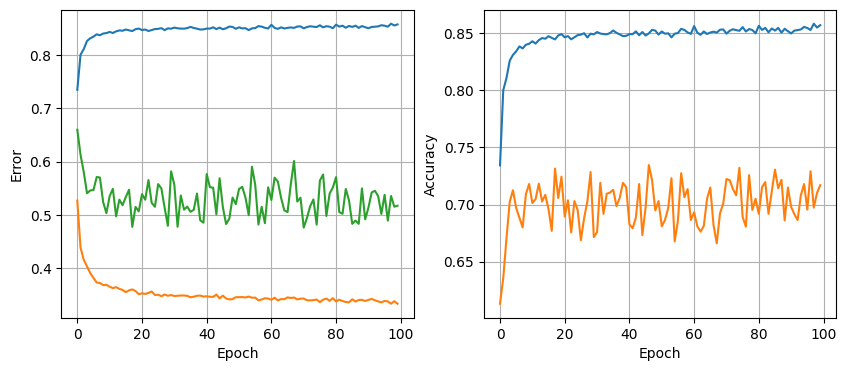

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3252
num_nodes: 16, dropout_probability: 0.2, lr: 0.001, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5828 - loss: 0.6696 - val_accuracy: 0.5322 - val_loss: 0.7671
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.4741 - val_accuracy: 0.6034 - val_loss: 0.6439
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7930 - loss: 0.4545 - val_accuracy: 0.6264 - val_loss: 0.6520
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8063 - loss: 0.4304 - val_accuracy: 0.6631 - val_loss: 0.5912
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8106 - loss: 0.4251 - val_accuracy: 0.6664 - val_loss: 0.6038
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8150 - loss: 0.4206 - val_accuracy: 0.6915 - val_loss: 0.5761
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8200 - loss: 0.40

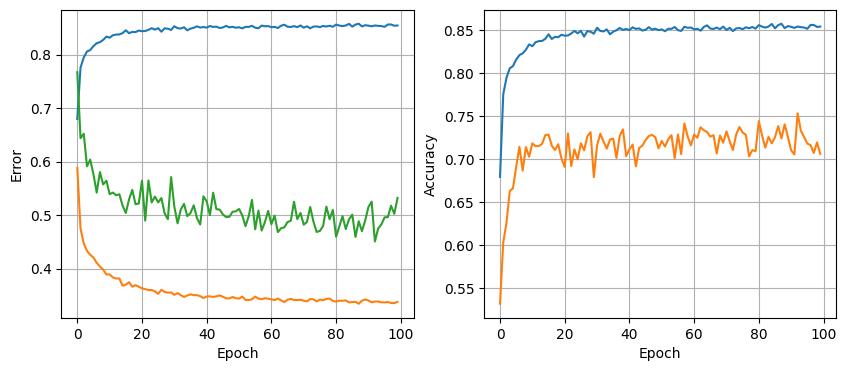

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8687 - loss: 0.3191
num_nodes: 16, dropout_probability: 0.2, lr: 0.001, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5785 - loss: 0.6851 - val_accuracy: 0.4783 - val_loss: 0.7454
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7629 - loss: 0.5000 - val_accuracy: 0.6047 - val_loss: 0.6415
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8032 - loss: 0.4389 - val_accuracy: 0.6278 - val_loss: 0.6243
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7996 - loss: 0.4397 - val_accuracy: 0.6424 - val_loss: 0.6221
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8063 - loss: 0.4309 - val_accuracy: 0.6749 - val_loss: 0.5829
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4148 - val_accuracy: 0.6641 - val_loss: 0.6116
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.40

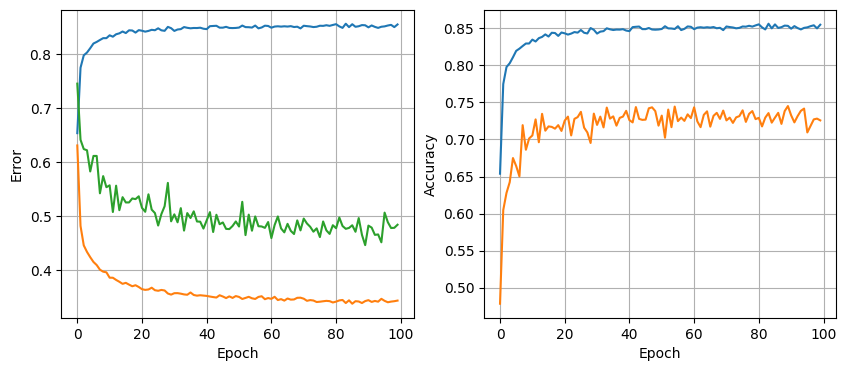

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3330
num_nodes: 16, dropout_probability: 0.2, lr: 0.001, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5763 - loss: 0.6841 - val_accuracy: 0.3773 - val_loss: 0.7432
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.5738 - val_accuracy: 0.5139 - val_loss: 0.7038
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.5000 - val_accuracy: 0.5576 - val_loss: 0.7075
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7853 - loss: 0.4650 - val_accuracy: 0.5973 - val_loss: 0.6513
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7930 - loss: 0.4533 - val_accuracy: 0.6020 - val_loss: 0.6363
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7932 - loss: 0.4403 - val_accuracy: 0.6122 - val_loss: 0.6334
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8015 - loss: 0.4354 - val_accu

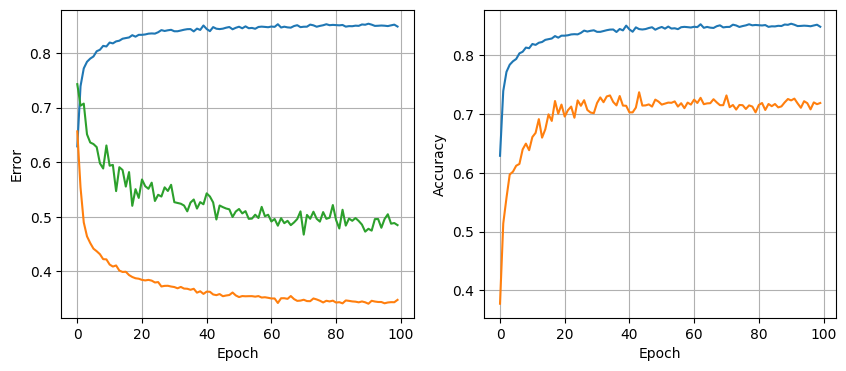

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3347
num_nodes: 32, dropout_probability: 0, lr: 0.01, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8019 - loss: 0.4291 - val_accuracy: 0.6854 - val_loss: 0.5663
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8457 - loss: 0.3512 - val_accuracy: 0.6997 - val_loss: 0.5221
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8437 - loss: 0.3474 - val_accuracy: 0.7437 - val_loss: 0.4773
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8556 - loss: 0.3316 - val_accuracy: 0.7210 - val_loss: 0.5101
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8636 - loss: 0.3193 - val_accuracy: 0.6712 - val_loss: 0.5818
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8641 - loss: 0.3202 - val_accuracy: 0.6664 - val_loss: 0.5645
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3222 

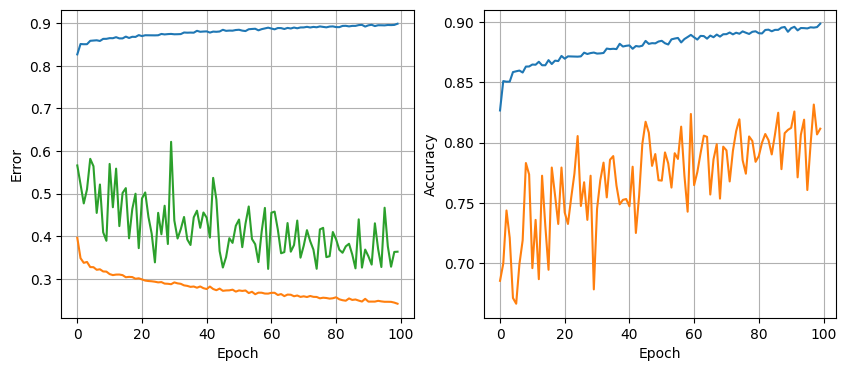

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8591 - loss: 0.4416
num_nodes: 32, dropout_probability: 0, lr: 0.01, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7880 - loss: 0.4445 - val_accuracy: 0.6993 - val_loss: 0.5875
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3439 - val_accuracy: 0.6424 - val_loss: 0.6653
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3388 - val_accuracy: 0.7529 - val_loss: 0.4849
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8659 - loss: 0.3223 - val_accuracy: 0.7220 - val_loss: 0.5047
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.3239 - val_accuracy: 0.7264 - val_loss: 0.4990
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.3220 - val_accuracy: 0.7580 - val_loss: 0.4355
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8607 - loss: 0.3161 

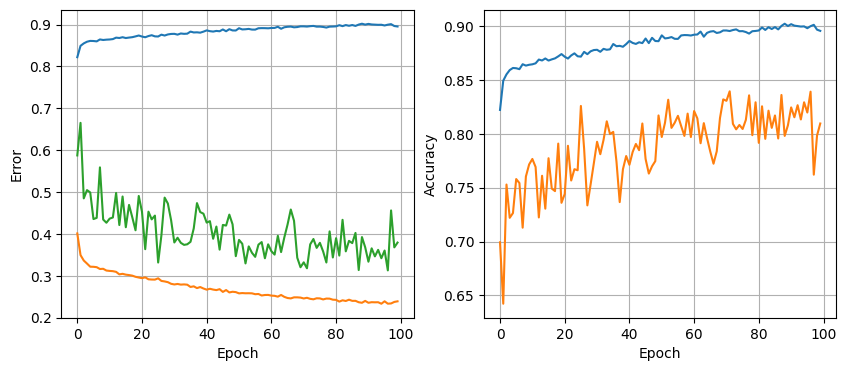

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.4597
num_nodes: 32, dropout_probability: 0, lr: 0.01, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7835 - loss: 0.4542 - val_accuracy: 0.7661 - val_loss: 0.4645
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8384 - loss: 0.3664 - val_accuracy: 0.7359 - val_loss: 0.4965
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8519 - loss: 0.3405 - val_accuracy: 0.6769 - val_loss: 0.5978
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8631 - loss: 0.3301 - val_accuracy: 0.7664 - val_loss: 0.4312
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8634 - loss: 0.3255 - val_accuracy: 0.7342 - val_loss: 0.4660
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8627 - loss: 0.3203 - val_accuracy: 0.7617 - val_loss: 0.4132
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8587 - loss: 0.3257 - val_accurac

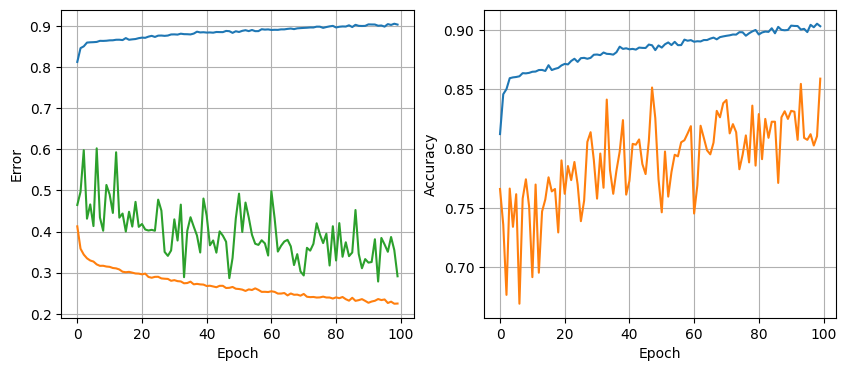

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8506 - loss: 0.4077
num_nodes: 32, dropout_probability: 0, lr: 0.005, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8092 - loss: 0.4281 - val_accuracy: 0.8054 - val_loss: 0.3746
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8439 - loss: 0.3593 - val_accuracy: 0.7553 - val_loss: 0.4716
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3374 - val_accuracy: 0.6986 - val_loss: 0.5763
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3387 - val_accuracy: 0.6783 - val_loss: 0.5791
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.3306 - val_accuracy: 0.7661 - val_loss: 0.4223
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8666 - loss: 0.3126 - val_accuracy: 0.7586 - val_loss: 0.4350
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8688 - loss: 0.3089

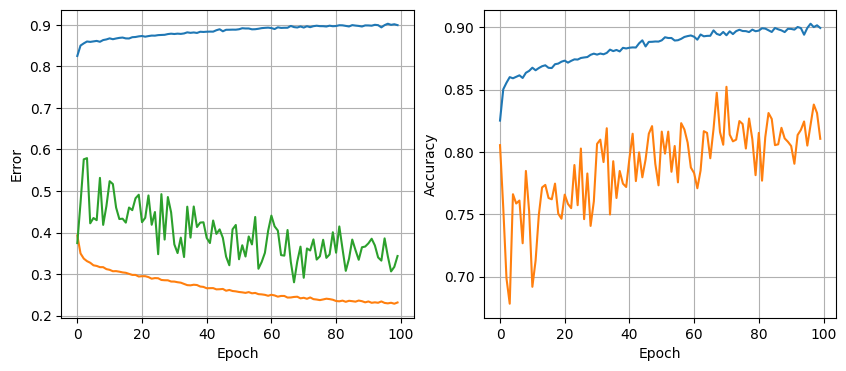

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.4238
num_nodes: 32, dropout_probability: 0, lr: 0.005, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7543 - loss: 0.4778 - val_accuracy: 0.7261 - val_loss: 0.5318
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8529 - loss: 0.3486 - val_accuracy: 0.7522 - val_loss: 0.4788
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8548 - loss: 0.3378 - val_accuracy: 0.6780 - val_loss: 0.5925
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3276 - val_accuracy: 0.7278 - val_loss: 0.4941
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3263 - val_accuracy: 0.7125 - val_loss: 0.5188
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8655 - loss: 0.3182 - val_accuracy: 0.7315 - val_loss: 0.4864
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8655 - loss: 0.3102

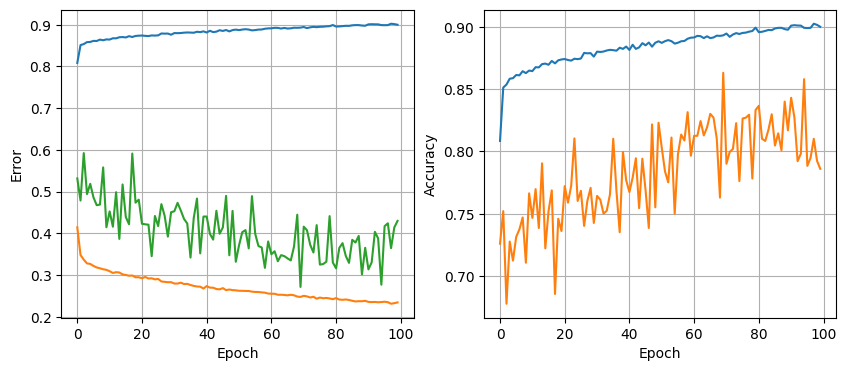

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3735
num_nodes: 32, dropout_probability: 0, lr: 0.005, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7326 - loss: 0.5321 - val_accuracy: 0.6905 - val_loss: 0.5872
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.3792 - val_accuracy: 0.6769 - val_loss: 0.6244
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8537 - loss: 0.3514 - val_accuracy: 0.6932 - val_loss: 0.5931
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8525 - loss: 0.3433 - val_accuracy: 0.7336 - val_loss: 0.5136
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8514 - loss: 0.3448 - val_accuracy: 0.7546 - val_loss: 0.4618
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8603 - loss: 0.3281 - val_accuracy: 0.7200 - val_loss: 0.5093
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.3216 - val_accura

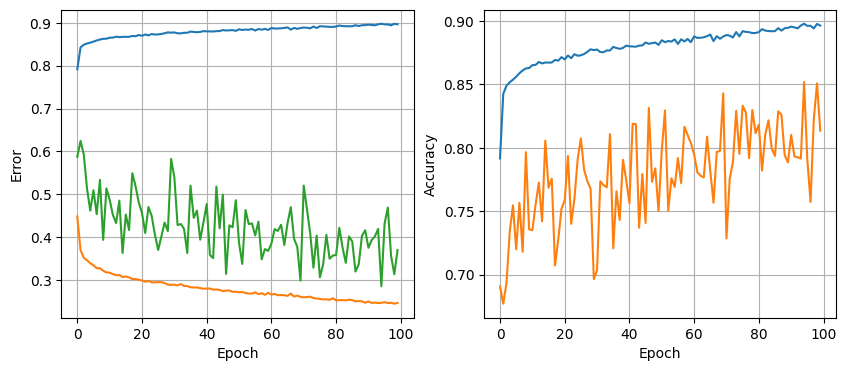

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.3646
num_nodes: 32, dropout_probability: 0, lr: 0.001, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7550 - loss: 0.5240 - val_accuracy: 0.6776 - val_loss: 0.5633
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8292 - loss: 0.3810 - val_accuracy: 0.7054 - val_loss: 0.5652
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8478 - loss: 0.3614 - val_accuracy: 0.6895 - val_loss: 0.6014
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8502 - loss: 0.3564 - val_accuracy: 0.7658 - val_loss: 0.4683
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8548 - loss: 0.3456 - val_accuracy: 0.7207 - val_loss: 0.5468
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8617 - loss: 0.3315 - val_accuracy: 0.7508 - val_loss: 0.4908
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8625 - loss: 0.3284

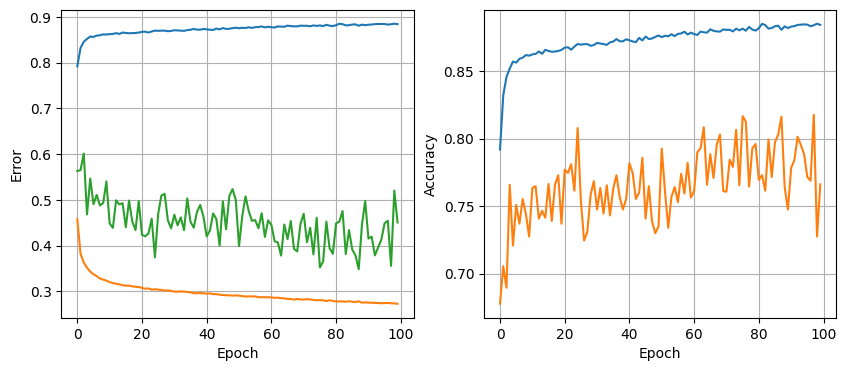

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8691 - loss: 0.3158
num_nodes: 32, dropout_probability: 0, lr: 0.001, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7046 - loss: 0.5977 - val_accuracy: 0.6390 - val_loss: 0.6148
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8173 - loss: 0.3988 - val_accuracy: 0.7197 - val_loss: 0.5215
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8418 - loss: 0.3705 - val_accuracy: 0.7153 - val_loss: 0.5480
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8474 - loss: 0.3567 - val_accuracy: 0.7071 - val_loss: 0.5789
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8464 - loss: 0.3567 - val_accuracy: 0.7227 - val_loss: 0.5564
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8611 - loss: 0.3336 - val_accuracy: 0.7512 - val_loss: 0.4973
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8496 - loss: 0.3536

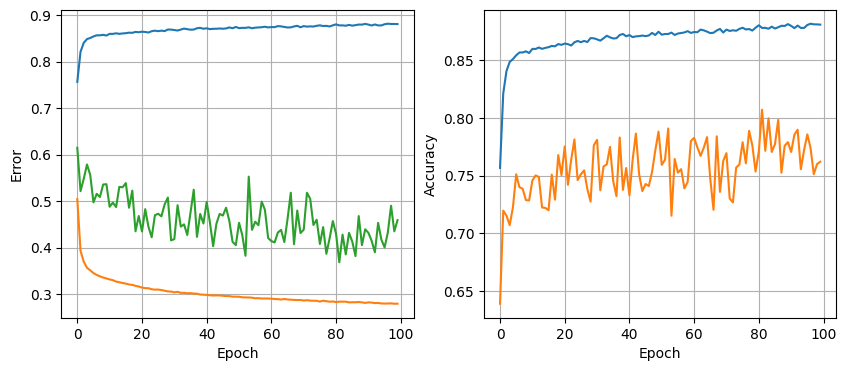

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3193
num_nodes: 32, dropout_probability: 0, lr: 0.001, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6537 - loss: 0.6232 - val_accuracy: 0.5793 - val_loss: 0.7159
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.4385 - val_accuracy: 0.6532 - val_loss: 0.6123
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8198 - loss: 0.3985 - val_accuracy: 0.6668 - val_loss: 0.6105
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.3847 - val_accuracy: 0.6956 - val_loss: 0.5722
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8373 - loss: 0.3776 - val_accuracy: 0.7061 - val_loss: 0.5690
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8439 - loss: 0.3649 - val_accuracy: 0.7193 - val_loss: 0.5387
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8452 - loss: 0.3630 - val_accura

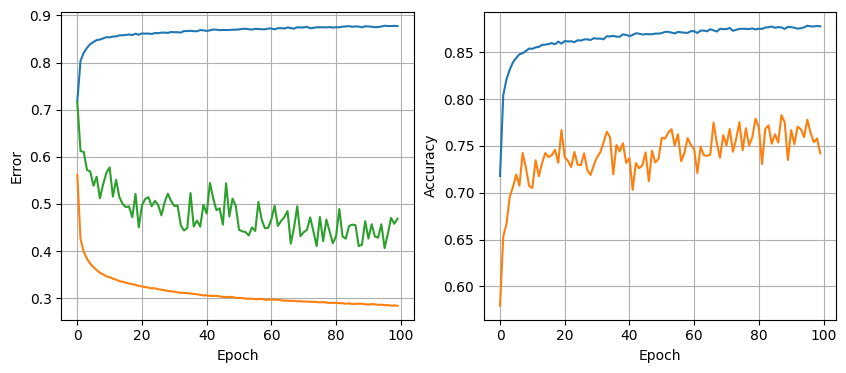

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8745 - loss: 0.3267
num_nodes: 32, dropout_probability: 0.2, lr: 0.01, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7748 - loss: 0.4655 - val_accuracy: 0.7020 - val_loss: 0.5671
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8338 - loss: 0.3922 - val_accuracy: 0.6475 - val_loss: 0.5618
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8422 - loss: 0.3734 - val_accuracy: 0.6217 - val_loss: 0.5928
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8537 - loss: 0.3540 - val_accuracy: 0.6851 - val_loss: 0.5812
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8402 - loss: 0.3618 - val_accuracy: 0.7247 - val_loss: 0.4928
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8464 - loss: 0.3623 - val_accuracy: 0.7292 - val_loss: 0.4505
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.352

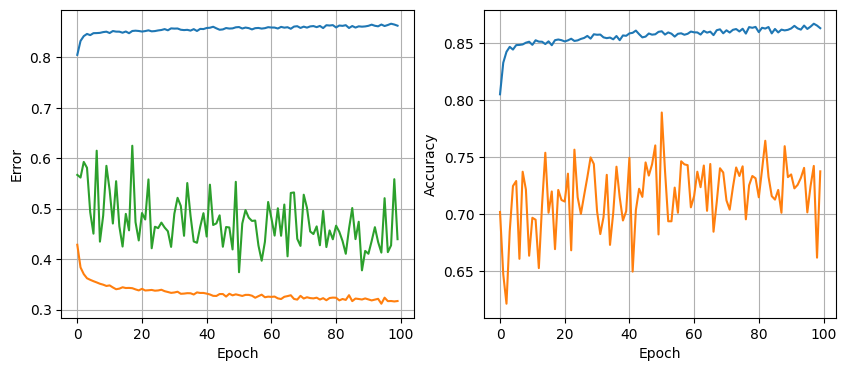

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3380
num_nodes: 32, dropout_probability: 0.2, lr: 0.01, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7694 - loss: 0.4749 - val_accuracy: 0.6807 - val_loss: 0.5348
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8328 - loss: 0.3902 - val_accuracy: 0.6769 - val_loss: 0.5741
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8442 - loss: 0.3647 - val_accuracy: 0.7485 - val_loss: 0.4531
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8478 - loss: 0.3575 - val_accuracy: 0.7017 - val_loss: 0.5196
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8473 - loss: 0.3510 - val_accuracy: 0.6661 - val_loss: 0.5847
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8506 - loss: 0.3458 - val_accuracy: 0.7298 - val_loss: 0.4976
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8473 - loss: 0.348

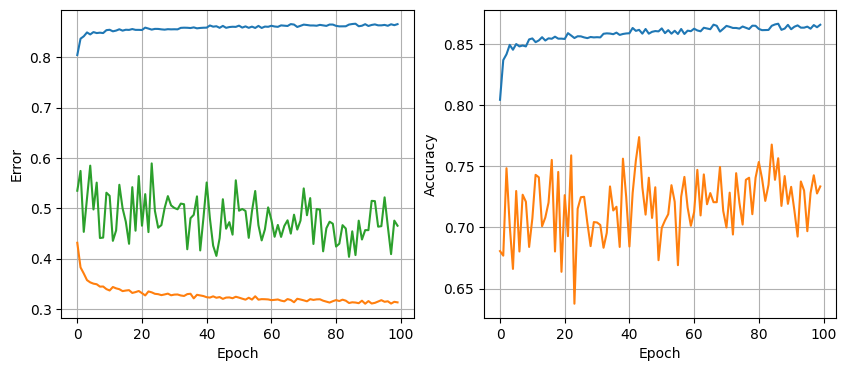

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3177
num_nodes: 32, dropout_probability: 0.2, lr: 0.01, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7648 - loss: 0.4925 - val_accuracy: 0.6231 - val_loss: 0.7161
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8284 - loss: 0.3969 - val_accuracy: 0.7163 - val_loss: 0.4779
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8366 - loss: 0.3740 - val_accuracy: 0.6851 - val_loss: 0.5453
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8437 - loss: 0.3622 - val_accuracy: 0.7095 - val_loss: 0.5091
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8479 - loss: 0.3462 - val_accuracy: 0.7339 - val_loss: 0.4701
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8481 - loss: 0.3520 - val_accuracy: 0.7132 - val_loss: 0.5377
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8517 - loss: 0.3393 - val_accur

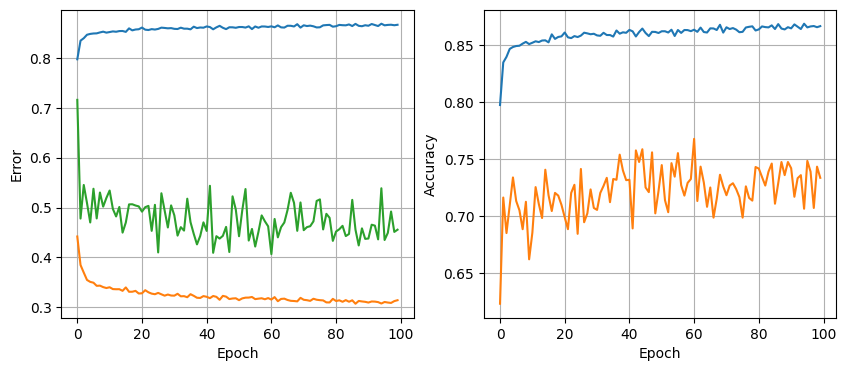

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8737 - loss: 0.3238
num_nodes: 32, dropout_probability: 0.2, lr: 0.005, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7610 - loss: 0.4801 - val_accuracy: 0.6732 - val_loss: 0.6146
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8369 - loss: 0.3824 - val_accuracy: 0.6790 - val_loss: 0.5707
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8410 - loss: 0.3728 - val_accuracy: 0.6292 - val_loss: 0.6301
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8475 - loss: 0.3588 - val_accuracy: 0.7275 - val_loss: 0.4923
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8473 - loss: 0.3517 - val_accuracy: 0.7892 - val_loss: 0.3899
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8556 - loss: 0.3450 - val_accuracy: 0.7207 - val_loss: 0.4921
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8504 - loss: 0.35

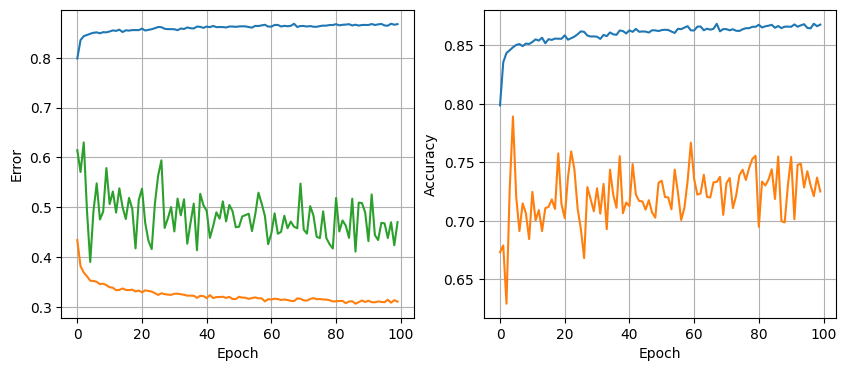

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.3337
num_nodes: 32, dropout_probability: 0.2, lr: 0.005, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7731 - loss: 0.4819 - val_accuracy: 0.7373 - val_loss: 0.5448
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8231 - loss: 0.4075 - val_accuracy: 0.7031 - val_loss: 0.5309
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8414 - loss: 0.3642 - val_accuracy: 0.7302 - val_loss: 0.4891
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8417 - loss: 0.3673 - val_accuracy: 0.6861 - val_loss: 0.5318
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8512 - loss: 0.3513 - val_accuracy: 0.7536 - val_loss: 0.4472
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8543 - loss: 0.3442 - val_accuracy: 0.6814 - val_loss: 0.5370
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8496 - loss: 0.34

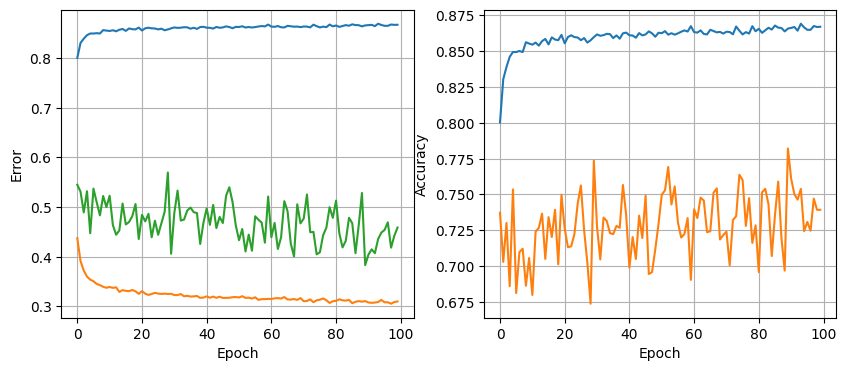

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3254
num_nodes: 32, dropout_probability: 0.2, lr: 0.005, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7179 - loss: 0.5404 - val_accuracy: 0.6610 - val_loss: 0.5910
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8181 - loss: 0.4043 - val_accuracy: 0.6810 - val_loss: 0.5860
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8352 - loss: 0.3810 - val_accuracy: 0.7427 - val_loss: 0.5176
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8350 - loss: 0.3715 - val_accuracy: 0.6783 - val_loss: 0.5890
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8434 - loss: 0.3624 - val_accuracy: 0.7593 - val_loss: 0.4436
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8476 - loss: 0.3540 - val_accuracy: 0.7231 - val_loss: 0.5144
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8497 - loss: 0.3471 - val_accu

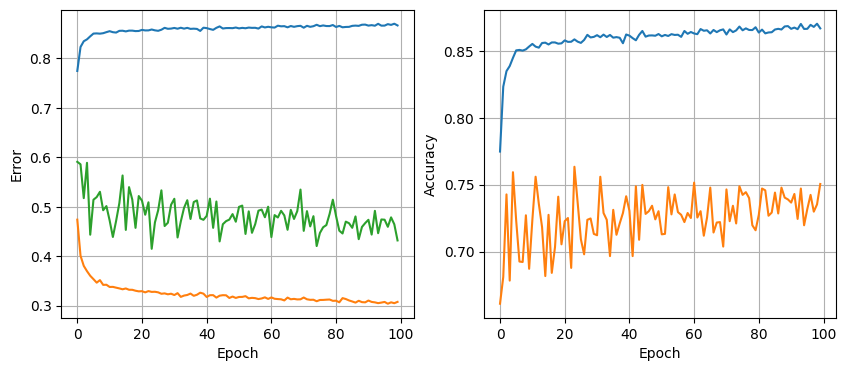

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3345
num_nodes: 32, dropout_probability: 0.2, lr: 0.001, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7311 - loss: 0.5547 - val_accuracy: 0.6383 - val_loss: 0.6079
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4335 - val_accuracy: 0.6220 - val_loss: 0.6665
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8151 - loss: 0.4146 - val_accuracy: 0.7095 - val_loss: 0.5384
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8237 - loss: 0.4032 - val_accuracy: 0.7515 - val_loss: 0.4790
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8283 - loss: 0.3896 - val_accuracy: 0.6953 - val_loss: 0.5443
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8380 - loss: 0.3775 - val_accuracy: 0.7193 - val_loss: 0.5355
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8395 - loss: 0.37

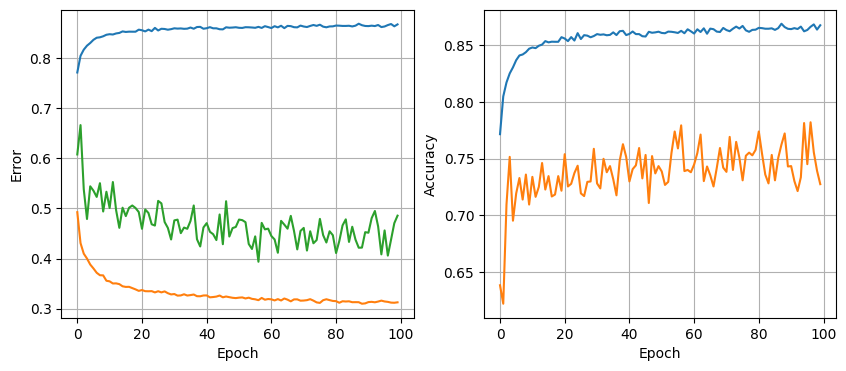

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3153
num_nodes: 32, dropout_probability: 0.2, lr: 0.001, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7104 - loss: 0.5920 - val_accuracy: 0.6339 - val_loss: 0.6590
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7868 - loss: 0.4558 - val_accuracy: 0.6339 - val_loss: 0.6691
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8024 - loss: 0.4303 - val_accuracy: 0.6597 - val_loss: 0.6098
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8162 - loss: 0.4161 - val_accuracy: 0.6749 - val_loss: 0.5848
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8189 - loss: 0.4076 - val_accuracy: 0.6837 - val_loss: 0.5737
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8196 - loss: 0.4027 - val_accuracy: 0.6776 - val_loss: 0.5997
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8274 - loss: 0.39

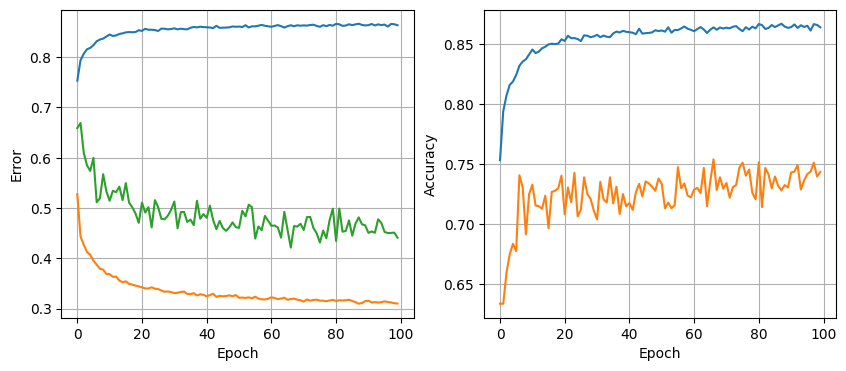

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3262
num_nodes: 32, dropout_probability: 0.2, lr: 0.001, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6792 - loss: 0.6199 - val_accuracy: 0.5759 - val_loss: 0.7139
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7828 - loss: 0.4711 - val_accuracy: 0.6037 - val_loss: 0.6762
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7961 - loss: 0.4422 - val_accuracy: 0.6339 - val_loss: 0.6183
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8028 - loss: 0.4356 - val_accuracy: 0.6434 - val_loss: 0.6255
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8139 - loss: 0.4156 - val_accuracy: 0.6725 - val_loss: 0.5868
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8134 - loss: 0.4081 - val_accuracy: 0.6790 - val_loss: 0.5857
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8166 - loss: 0.4094 - val_acc

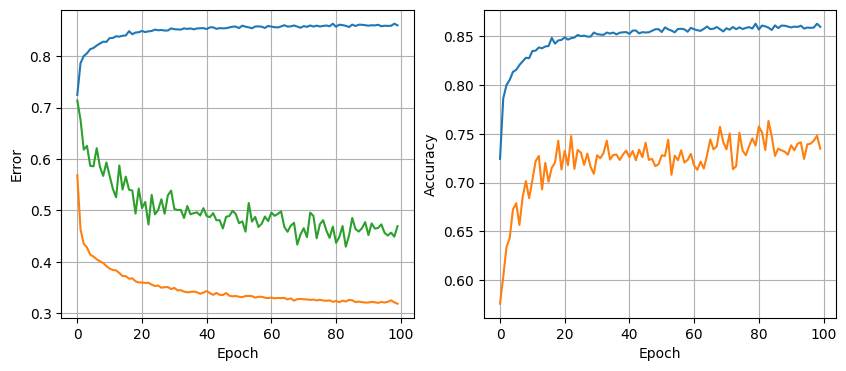

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3261
num_nodes: 64, dropout_probability: 0, lr: 0.01, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7970 - loss: 0.4296 - val_accuracy: 0.7393 - val_loss: 0.4732
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8481 - loss: 0.3617 - val_accuracy: 0.7692 - val_loss: 0.4782
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8547 - loss: 0.3400 - val_accuracy: 0.7349 - val_loss: 0.4607
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3256 - val_accuracy: 0.6959 - val_loss: 0.5466
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8605 - loss: 0.3219 - val_accuracy: 0.7034 - val_loss: 0.5489
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8593 - loss: 0.3196 - val_accuracy: 0.7234 - val_loss: 0.5073
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8642 - loss: 0.3169 

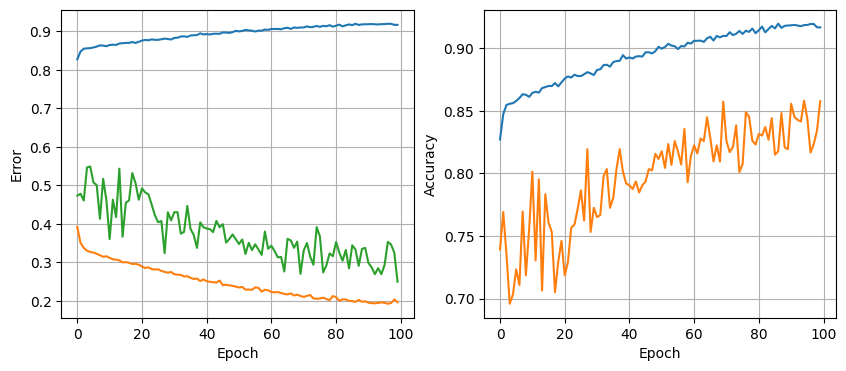

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8373 - loss: 0.6852
num_nodes: 64, dropout_probability: 0, lr: 0.01, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7892 - loss: 0.4391 - val_accuracy: 0.6624 - val_loss: 0.6281
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8503 - loss: 0.3435 - val_accuracy: 0.7997 - val_loss: 0.3505
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8554 - loss: 0.3382 - val_accuracy: 0.6969 - val_loss: 0.5557
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8617 - loss: 0.3216 - val_accuracy: 0.7156 - val_loss: 0.5634
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8569 - loss: 0.3331 - val_accuracy: 0.7234 - val_loss: 0.4716
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8621 - loss: 0.3176 - val_accuracy: 0.7434 - val_loss: 0.4420
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8578 - loss: 0.3197 

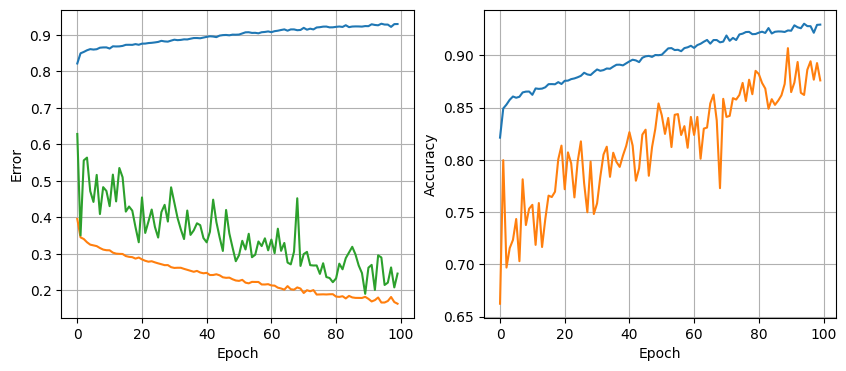

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.6633
num_nodes: 64, dropout_probability: 0, lr: 0.01, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7751 - loss: 0.4596 - val_accuracy: 0.6139 - val_loss: 0.7065
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8511 - loss: 0.3501 - val_accuracy: 0.6793 - val_loss: 0.5529
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8542 - loss: 0.3341 - val_accuracy: 0.7054 - val_loss: 0.5278
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8581 - loss: 0.3283 - val_accuracy: 0.6966 - val_loss: 0.5346
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8585 - loss: 0.3243 - val_accuracy: 0.7115 - val_loss: 0.5213
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8586 - loss: 0.3290 - val_accuracy: 0.7966 - val_loss: 0.3851
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8609 - loss: 0.3160 - val_accurac

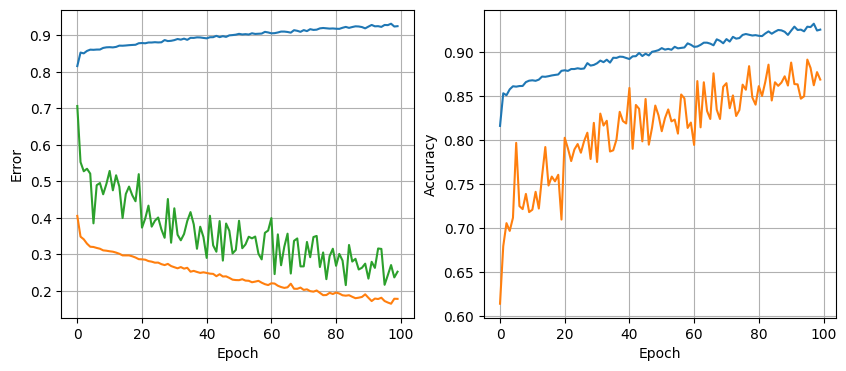

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8371 - loss: 0.6028
num_nodes: 64, dropout_probability: 0, lr: 0.005, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8022 - loss: 0.4333 - val_accuracy: 0.7000 - val_loss: 0.5534
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8462 - loss: 0.3549 - val_accuracy: 0.6481 - val_loss: 0.6791
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8492 - loss: 0.3434 - val_accuracy: 0.6990 - val_loss: 0.5480
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8577 - loss: 0.3266 - val_accuracy: 0.7573 - val_loss: 0.4280
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8639 - loss: 0.3164 - val_accuracy: 0.7607 - val_loss: 0.4541
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8628 - loss: 0.3184 - val_accuracy: 0.6695 - val_loss: 0.5485
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8577 - loss: 0.3187

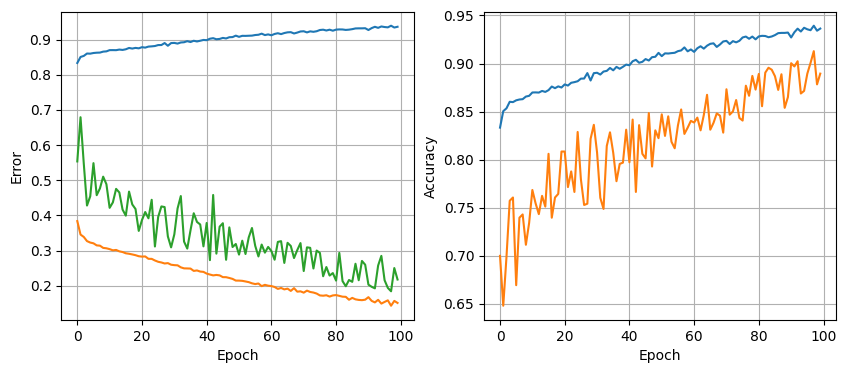

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8449 - loss: 0.6740
num_nodes: 64, dropout_probability: 0, lr: 0.005, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7908 - loss: 0.4471 - val_accuracy: 0.7390 - val_loss: 0.4970
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8499 - loss: 0.3533 - val_accuracy: 0.6797 - val_loss: 0.5840
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8532 - loss: 0.3341 - val_accuracy: 0.7051 - val_loss: 0.5294
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8637 - loss: 0.3252 - val_accuracy: 0.7376 - val_loss: 0.4864
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8559 - loss: 0.3261 - val_accuracy: 0.7400 - val_loss: 0.4959
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8689 - loss: 0.3119 - val_accuracy: 0.7295 - val_loss: 0.4973
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8558 - loss: 0.3204

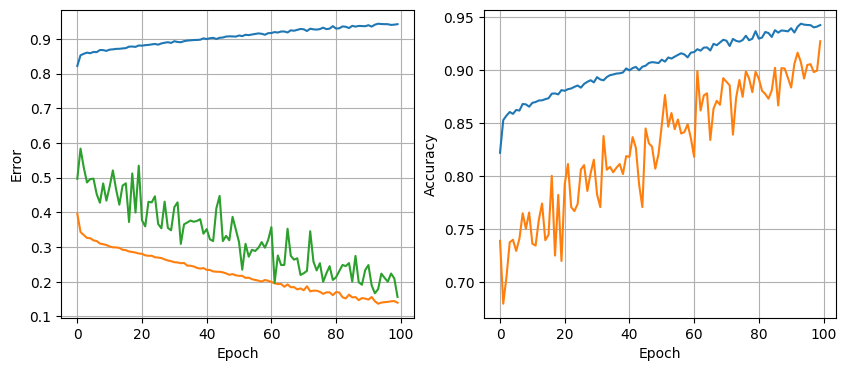

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8261 - loss: 0.7566
num_nodes: 64, dropout_probability: 0, lr: 0.005, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7679 - loss: 0.4747 - val_accuracy: 0.7651 - val_loss: 0.4499
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.3617 - val_accuracy: 0.7159 - val_loss: 0.5622
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8464 - loss: 0.3470 - val_accuracy: 0.7108 - val_loss: 0.5424
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8568 - loss: 0.3294 - val_accuracy: 0.7373 - val_loss: 0.4749
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8614 - loss: 0.3229 - val_accuracy: 0.6929 - val_loss: 0.5602
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8640 - loss: 0.3207 - val_accuracy: 0.6986 - val_loss: 0.5446
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8633 - loss: 0.3199 - val_accura

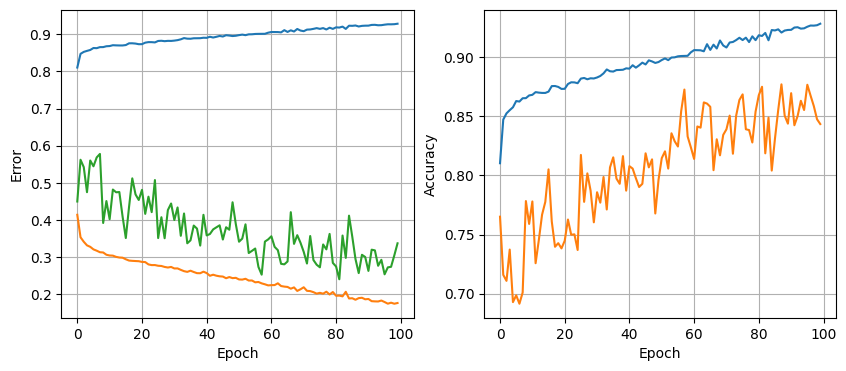

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.5109
num_nodes: 64, dropout_probability: 0, lr: 0.001, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7639 - loss: 0.4832 - val_accuracy: 0.6885 - val_loss: 0.5519
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8399 - loss: 0.3682 - val_accuracy: 0.6871 - val_loss: 0.6056
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.3474 - val_accuracy: 0.7400 - val_loss: 0.5066
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8542 - loss: 0.3395 - val_accuracy: 0.7237 - val_loss: 0.5258
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8607 - loss: 0.3314 - val_accuracy: 0.7261 - val_loss: 0.5006
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8616 - loss: 0.3271 - val_accuracy: 0.7617 - val_loss: 0.4435
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8594 - loss: 0.3238

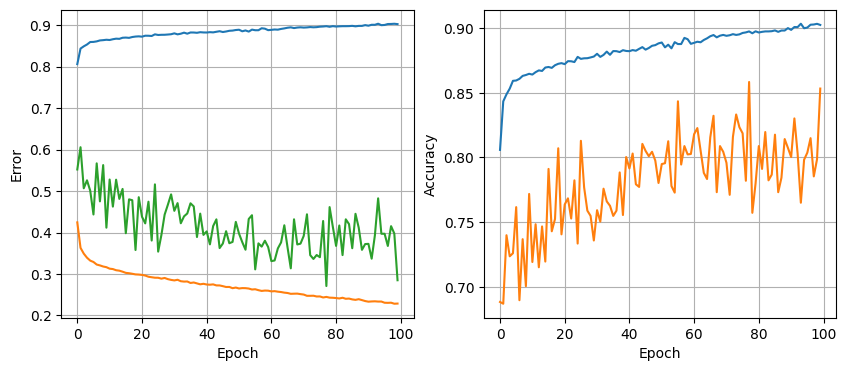

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8493 - loss: 0.3872
num_nodes: 64, dropout_probability: 0, lr: 0.001, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7810 - loss: 0.4935 - val_accuracy: 0.6783 - val_loss: 0.5677
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8334 - loss: 0.3794 - val_accuracy: 0.6647 - val_loss: 0.6029
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8514 - loss: 0.3450 - val_accuracy: 0.7464 - val_loss: 0.4937
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8496 - loss: 0.3525 - val_accuracy: 0.7566 - val_loss: 0.4829
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8598 - loss: 0.3294 - val_accuracy: 0.7759 - val_loss: 0.4390
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8578 - loss: 0.3346 - val_accuracy: 0.7288 - val_loss: 0.5077
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8611 - loss: 0.3255

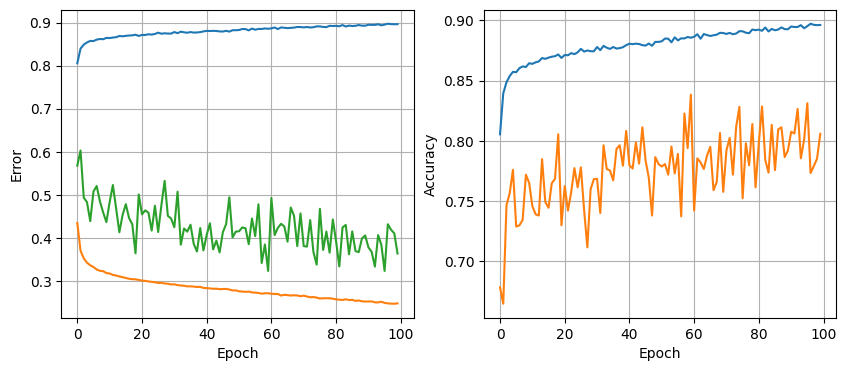

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8587 - loss: 0.3579
num_nodes: 64, dropout_probability: 0, lr: 0.001, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6984 - loss: 0.5678 - val_accuracy: 0.6332 - val_loss: 0.6083
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8203 - loss: 0.3947 - val_accuracy: 0.6729 - val_loss: 0.5715
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8377 - loss: 0.3668 - val_accuracy: 0.6725 - val_loss: 0.5947
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8427 - loss: 0.3575 - val_accuracy: 0.7305 - val_loss: 0.5357
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8456 - loss: 0.3518 - val_accuracy: 0.7298 - val_loss: 0.5288
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8468 - loss: 0.3515 - val_accuracy: 0.7441 - val_loss: 0.4840
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8550 - loss: 0.3337 - val_accura

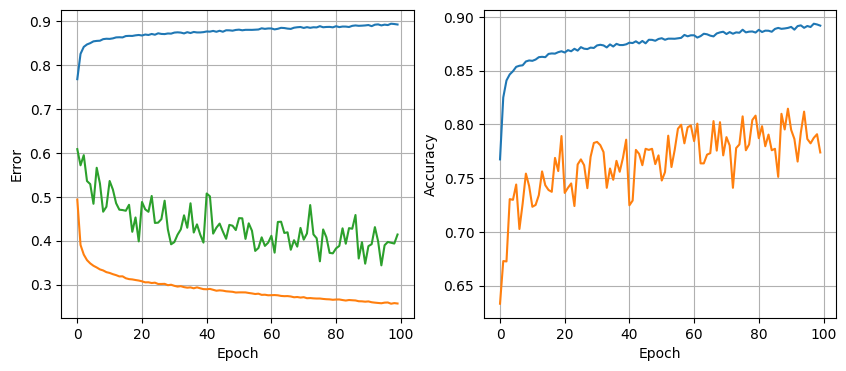

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8693 - loss: 0.3373
num_nodes: 64, dropout_probability: 0.2, lr: 0.01, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7863 - loss: 0.4621 - val_accuracy: 0.6861 - val_loss: 0.5436
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8525 - loss: 0.3554 - val_accuracy: 0.7261 - val_loss: 0.4555
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8465 - loss: 0.3566 - val_accuracy: 0.7041 - val_loss: 0.5143
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8534 - loss: 0.3473 - val_accuracy: 0.6356 - val_loss: 0.6604
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8492 - loss: 0.3566 - val_accuracy: 0.7359 - val_loss: 0.5125
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8513 - loss: 0.3389 - val_accuracy: 0.7108 - val_loss: 0.4734
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8502 - loss: 0.337

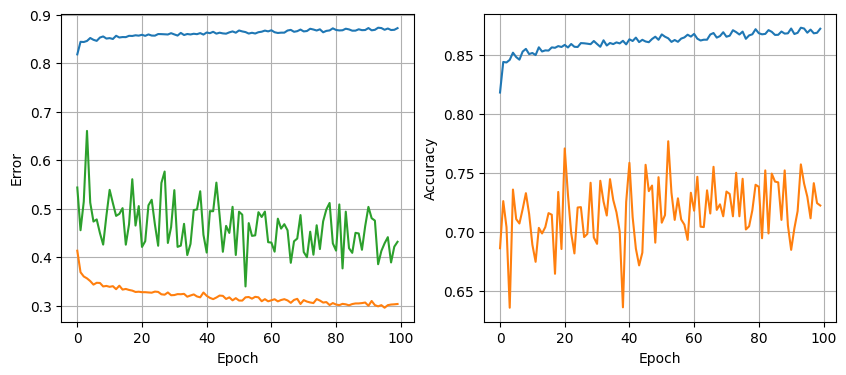

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8718 - loss: 0.3482
num_nodes: 64, dropout_probability: 0.2, lr: 0.01, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7959 - loss: 0.4437 - val_accuracy: 0.6414 - val_loss: 0.6965
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8339 - loss: 0.3840 - val_accuracy: 0.6800 - val_loss: 0.5828
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8427 - loss: 0.3570 - val_accuracy: 0.6966 - val_loss: 0.5941
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8486 - loss: 0.3485 - val_accuracy: 0.6966 - val_loss: 0.5177
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8546 - loss: 0.3422 - val_accuracy: 0.7376 - val_loss: 0.4528
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8521 - loss: 0.3436 - val_accuracy: 0.7451 - val_loss: 0.4292
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8474 - loss: 0.342

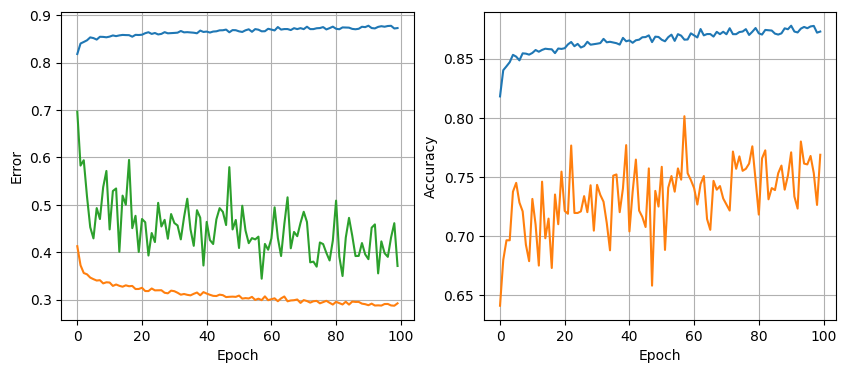

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - loss: 0.3764
num_nodes: 64, dropout_probability: 0.2, lr: 0.01, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7530 - loss: 0.4777 - val_accuracy: 0.6705 - val_loss: 0.6111
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8368 - loss: 0.3815 - val_accuracy: 0.7332 - val_loss: 0.4599
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8423 - loss: 0.3614 - val_accuracy: 0.6288 - val_loss: 0.5884
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8475 - loss: 0.3507 - val_accuracy: 0.7078 - val_loss: 0.5494
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8540 - loss: 0.3404 - val_accuracy: 0.7112 - val_loss: 0.4587
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8511 - loss: 0.3422 - val_accuracy: 0.6973 - val_loss: 0.5290
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8585 - loss: 0.3311 - val_accur

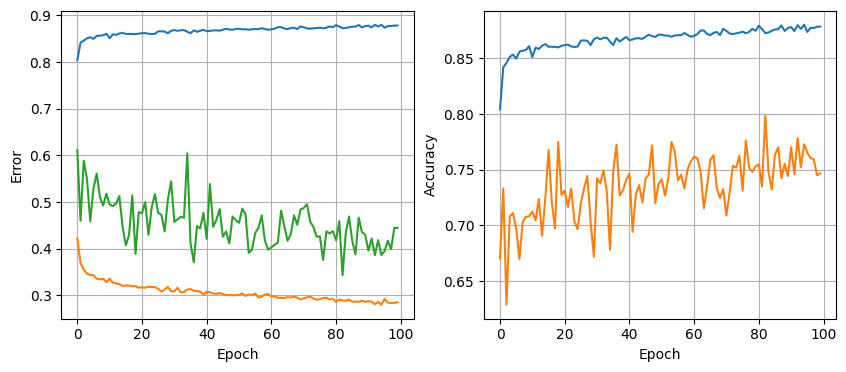

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3297
num_nodes: 64, dropout_probability: 0.2, lr: 0.005, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7914 - loss: 0.4564 - val_accuracy: 0.7078 - val_loss: 0.5478
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8372 - loss: 0.3792 - val_accuracy: 0.7200 - val_loss: 0.5255
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8399 - loss: 0.3596 - val_accuracy: 0.7569 - val_loss: 0.4343
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8522 - loss: 0.3442 - val_accuracy: 0.7471 - val_loss: 0.4651
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8505 - loss: 0.3509 - val_accuracy: 0.7092 - val_loss: 0.5550
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8502 - loss: 0.3373 - val_accuracy: 0.6773 - val_loss: 0.5211
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8586 - loss: 0.33

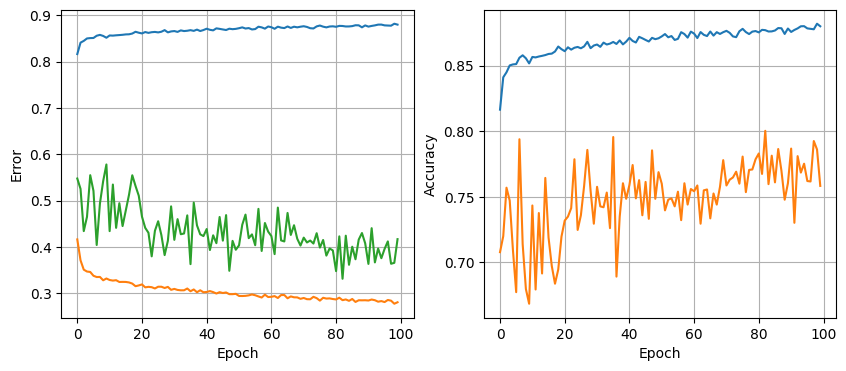

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.3240
num_nodes: 64, dropout_probability: 0.2, lr: 0.005, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7811 - loss: 0.4639 - val_accuracy: 0.6732 - val_loss: 0.5871
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8422 - loss: 0.3685 - val_accuracy: 0.6776 - val_loss: 0.5745
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8423 - loss: 0.3614 - val_accuracy: 0.7163 - val_loss: 0.5146
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8577 - loss: 0.3426 - val_accuracy: 0.7454 - val_loss: 0.4715
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8555 - loss: 0.3359 - val_accuracy: 0.7292 - val_loss: 0.4507
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8536 - loss: 0.3360 - val_accuracy: 0.6719 - val_loss: 0.5735
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8530 - loss: 0.34

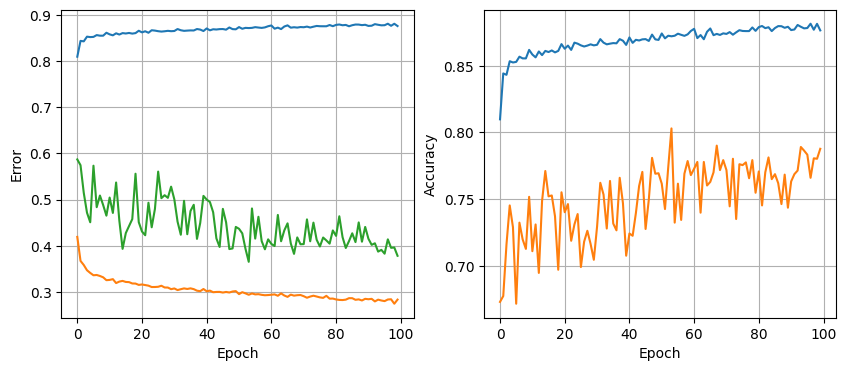

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3364
num_nodes: 64, dropout_probability: 0.2, lr: 0.005, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7442 - loss: 0.5089 - val_accuracy: 0.7078 - val_loss: 0.5538
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8286 - loss: 0.3850 - val_accuracy: 0.7264 - val_loss: 0.5051
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8401 - loss: 0.3736 - val_accuracy: 0.7207 - val_loss: 0.5576
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8399 - loss: 0.3615 - val_accuracy: 0.7037 - val_loss: 0.5195
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8520 - loss: 0.3428 - val_accuracy: 0.6925 - val_loss: 0.5441
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8521 - loss: 0.3399 - val_accuracy: 0.7190 - val_loss: 0.4993
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8541 - loss: 0.3387 - val_accu

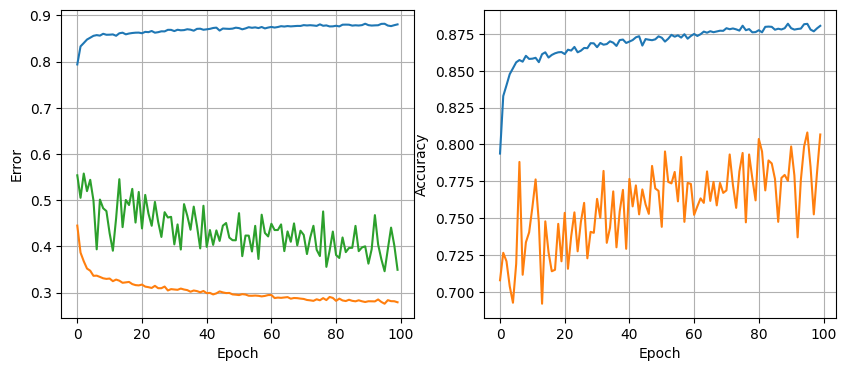

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3367
num_nodes: 64, dropout_probability: 0.2, lr: 0.001, batch_size: 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7548 - loss: 0.5024 - val_accuracy: 0.6410 - val_loss: 0.6406
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8226 - loss: 0.3972 - val_accuracy: 0.7244 - val_loss: 0.5059
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8410 - loss: 0.3773 - val_accuracy: 0.6864 - val_loss: 0.5759
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8396 - loss: 0.3708 - val_accuracy: 0.7163 - val_loss: 0.5445
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8495 - loss: 0.3550 - val_accuracy: 0.6925 - val_loss: 0.5693
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8504 - loss: 0.3520 - val_accuracy: 0.7146 - val_loss: 0.5230
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8527 - loss: 0.33

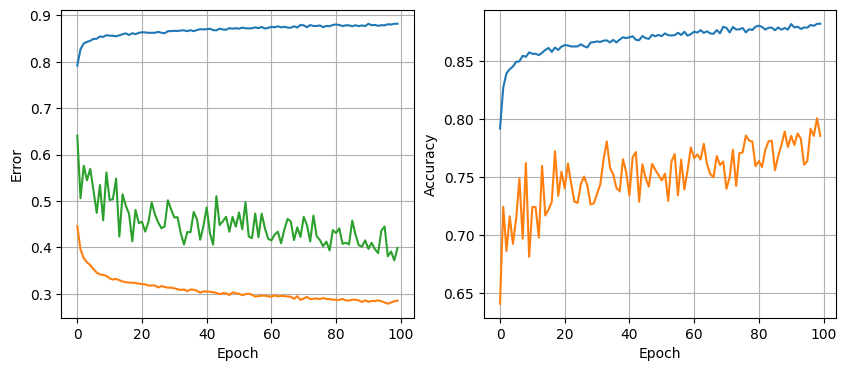

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8734 - loss: 0.3173
num_nodes: 64, dropout_probability: 0.2, lr: 0.001, batch_size: 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7044 - loss: 0.5626 - val_accuracy: 0.6305 - val_loss: 0.6237
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8200 - loss: 0.4038 - val_accuracy: 0.6661 - val_loss: 0.5718
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8263 - loss: 0.3965 - val_accuracy: 0.6912 - val_loss: 0.5692
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8349 - loss: 0.3752 - val_accuracy: 0.7336 - val_loss: 0.5304
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8437 - loss: 0.3589 - val_accuracy: 0.7231 - val_loss: 0.5322
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8365 - loss: 0.3807 - val_accuracy: 0.7129 - val_loss: 0.5490
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 0.35

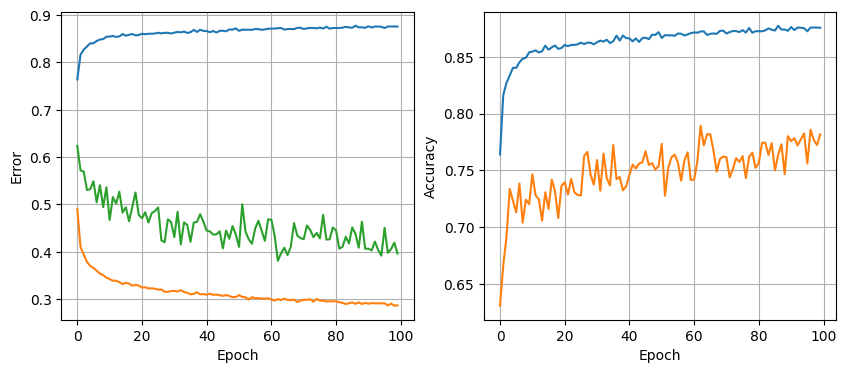

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8729 - loss: 0.3286
num_nodes: 64, dropout_probability: 0.2, lr: 0.001, batch_size: 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7188 - loss: 0.5607 - val_accuracy: 0.6017 - val_loss: 0.6710
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8088 - loss: 0.4200 - val_accuracy: 0.6600 - val_loss: 0.5865
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 0.4002 - val_accuracy: 0.6746 - val_loss: 0.5717
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8324 - loss: 0.3915 - val_accuracy: 0.7092 - val_loss: 0.5525
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8370 - loss: 0.3784 - val_accuracy: 0.7142 - val_loss: 0.5482
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8418 - loss: 0.3701 - val_accuracy: 0.6851 - val_loss: 0.5982
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8452 - loss: 0.3656 - val_accu

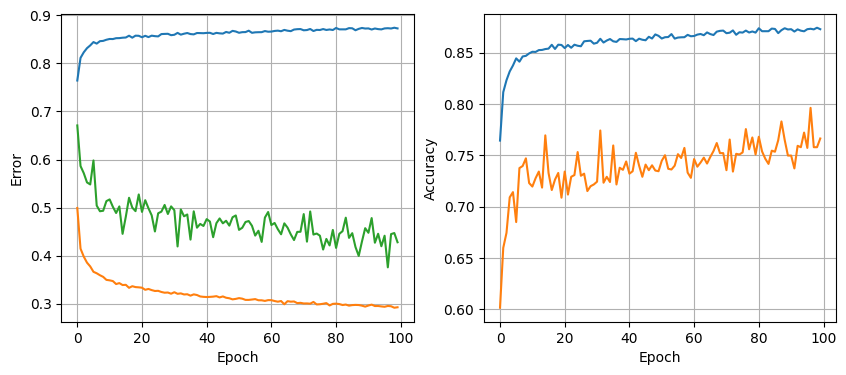

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3175


In [45]:
least_val_loss = float('inf')
least_loss_model = None

epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_probability in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'num_nodes: {num_nodes}, dropout_probability: {dropout_probability}, lr: {lr}, batch_size: {batch_size}')
        history, model = nn_model(X_train, Y_train, num_nodes, dropout_probability, lr, batch_size, epochs)
        plot_model(history)
        val_loss = model.evaluate(X_validate, Y_validate)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model



In [46]:
y_pred_nn = least_loss_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)
print(classification_report(Y_test, y_pred_nn))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1338
           1       0.90      0.91      0.90      2466

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

